In [1]:
# DESC : This progrma attempts to optimize a users portfolio using the Efficient Frontier & Python
# Import the python lib

import FinanceDataReader as fdr
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# 가상 포트폴리오 만들기
# 엔비디아, GLD ETF, QQQ, SPY, 애플
assets = ["NVDA", "GLD", "QQQ", "SPY", "AAPL"]

# Assign weights to the stocks.
# weights = np.full(len(assets), 1 / len(assets))  # np.full() 활용
# weights = [0.6, 0.12, 0.11, 0.15, 0.003]
weights = np.array([0.6, 0.12, 0.11, 0.15, 0.003])
weights

array([0.6  , 0.12 , 0.11 , 0.15 , 0.003])

In [3]:
# 주식 시작일 2013/1/1
stockStartDate = '2013-01-01'

# 주식 종료일
today = datetime.today().strftime("%Y-%m-%d")

In [4]:
# 각 주식의 일별 종가 데이터를 저장할 데이터 프레임 생성
def fetch_data(assets: list, start_dt: str, end_dt: str) -> pd.DataFrame:
    closes = []  # 종가 데이터를 저장할 리스트

    for ticker in assets:
        # 주가 데이터 불러오기
        fetched_df = fdr.DataReader(ticker, start=start_dt, end=end_dt)

        # 'Date' 컬럼을 인덱스로 설정하고, 종가만 남기기
        history_df = pd.DataFrame({
            'Date': fetched_df.index,
            ticker: fetched_df['Close']
        })
        history_df.set_index('Date', drop=True, inplace=True)

        # 종가 데이터 추가
        closes.append(history_df)

    # 여러 종목의 종가 데이터를 하나의 DataFrame으로 합치기
    closes = pd.concat(closes, axis=1)

    # 결측치(NaN) 제거
    closes.dropna(inplace=True)

    return closes

# Store the adjusted close price of stock into the data frame
df = fetch_data(assets=assets, start_dt = stockStartDate, end_dt = today)
df

,NVDA,GLD,QQQ,SPY,AAPL
Date,,,,,
2012-12-31,0.306500,162.020004,65.129997,142.410004,19.006071
2013-01-02,0.318000,163.169998,67.199997,146.059998,19.608213
2013-01-03,0.318250,161.199997,66.849998,145.729996,19.360714
2013-01-04,0.328750,160.440002,66.629997,146.369995,18.821428
2013-01-07,0.319250,159.429993,66.650002,145.970001,18.710714
...,...,...,...,...,...
2025-03-10,106.980003,266.040009,472.730011,560.580017,227.479996
2025-03-11,108.760002,269.160004,471.600006,555.919983,220.839996
2025-03-12,115.739998,270.329987,476.920013,558.869995,216.979996


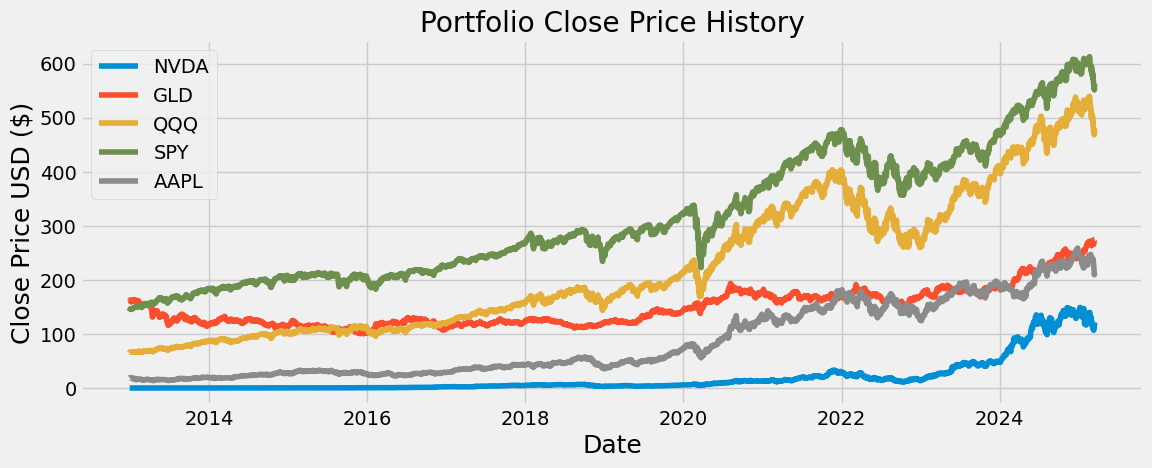

In [5]:
# 그래프 제목 설정
title = 'Portfolio Close Price History'

# Get the stocks
my_stocks = df

# Create and plot the graph
plt.figure(figsize=(12.2, 4.5))  # 가로 12.2인치, 세로 4.5인치

# Loop through each stock and plot the Adj Close for each day
# 각 주식 종목의 종가 데이터 플로팅
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label=c)  # 각 주식의 종가 플로팅

# 그래프 스타일 설정
plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend(df.columns.values, loc='upper left')
plt.show()

In [6]:
# show the daily simple returns, NOTE : Fomula = new_price/old_price - 1
returns = df.pct_change()
returns

,NVDA,GLD,QQQ,SPY,AAPL
Date,,,,,
2012-12-31,NaN,NaN,NaN,NaN,NaN
2013-01-02,0.037520,0.007098,0.031783,0.025630,0.031682
2013-01-03,0.000786,-0.012073,-0.005208,-0.002259,-0.012622
2013-01-04,0.032993,-0.004715,-0.003291,0.004392,-0.027855
2013-01-07,-0.028897,-0.006295,0.000300,-0.002733,-0.005882
...,...,...,...,...,...
2025-03-10,-0.050670,-0.008756,-0.038756,-0.026636,-0.048480
2025-03-11,0.016639,0.011728,-0.002390,-0.008313,-0.029189
2025-03-12,0.064178,0.004347,0.011281,0.005307,-0.017479


In [7]:
# 연간 공분산 행렬을 계산하고 출력
# NOTE : 공분산 행렬 -> 서로 다른 모집단의 데이터 샘플을 비교할 때 통계에서 일반적으로 사용되는 수학적 개념
# 공분산 행렬을 통해 두 자산 가격간의 방향 관계 알아낼 수 있음
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,NVDA,GLD,QQQ,SPY,AAPL
NVDA,0.210829,0.001601,0.068359,0.048202,0.063464
GLD,0.001601,0.022309,0.001512,0.001036,0.001549
QQQ,0.068359,0.001512,0.042671,0.032114,0.044535
SPY,0.048202,0.001036,0.032114,0.028137,0.032738
AAPL,0.063464,0.001549,0.044535,0.032738,0.078446


In [8]:
# 포트폴리오 분산의 기대값 = WT * (공분산 행렬) * W
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.09672546980284871

In [9]:
# 포트폴리오 변동성의 기대값 = SQRT (WT * (공분산 매트릭스) * W)
port_volatility = np.sqrt(port_variance)
port_volatility

0.3110071860951909

In [10]:
# 포트폴리오의 연간 수익률 계산하고 출력
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights) * 252
portfolioSimpleAnnualReturn

0.404490315285619

In [11]:
# 예상되는 연간 수익, 변동성 또는 위험 및 분산
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print("Expected annual return : " + percent_ret)
print("Annual volatility/standard deviation/risk : " + percent_vols)
print("Annual variance : " +percent_var)

Expected annual return : 40.0%
Annual volatility/standard deviation/risk : 31.0%
Annual variance : 10.0%


In [12]:
# 포트폴리오 최적화
# 최소한의 위험으로, 최대 수익 실현 -> Robert Ansrew Martin 이 만든 패키지 사용
# pyportfolioopt 라는 패키지 이용

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# 예상 수익률과 일일 자산 수익률의 연간 표본 공분산 행렬 계산
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()  # Sharpe ratio, and get the raw weights

cleaned_weights = ef.clean_weights()

# Note the weights may have some round error, meaning they may not add up exactly to 1 but should be close
print(cleaned_weights)

ef.portfolio_performance(verbose=True)

OrderedDict({'NVDA': 0.56423, 'GLD': 0.34657, 'QQQ': 0.0, 'SPY': 0.0, 'AAPL': 0.08921})
Expected annual return: 39.3%
Annual volatility: 27.8%
Sharpe Ratio: 1.41


(0.3930196932212443, 0.27844619962769634, 1.411474438317856)

In [13]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights

# 만약 15000 달러를 투자한다고 하면 아래의 결과와 같이 엔비디아 : 69주, GLD ETF : 19주, 애플 : 6주 투자
# 남은돈 94.27$
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)
allocation, leftover = da.lp_portfolio()

print("Discrete allocation : ", allocation)
print("Funds remaining : ${:.2f}".format(leftover))

Discrete allocation :  {'NVDA': 69, 'GLD': 19, 'AAPL': 6}
Funds remaining : $94.27


# 그래서 우리 프로젝트의 목적

1. 사용자가 주식을 담는다. ->
